# Домашнее задание.
# Корнеев А. В. БПМ-152

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
buf = plt.imread('221059.png')

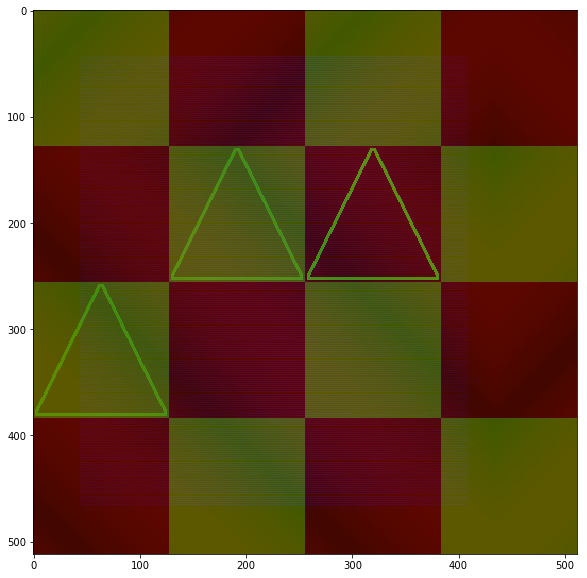

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(buf[:,:,0:3])

# Задание 1. 
Найти уравнение окружности по трем точкам, расположенным в слое A. Изобразить окружность на
графике вместе с тремя точкам, по которым она построена.

In [4]:
bufA = buf[:,:,3]

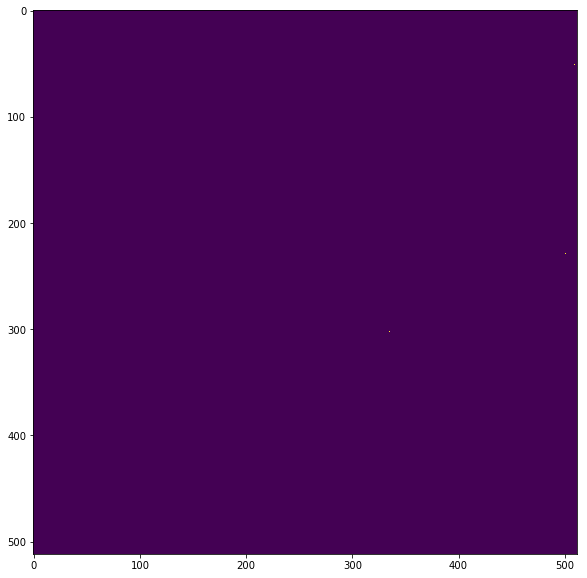

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(bufA)

In [6]:
temp1 = np.array(np.where(bufA!=0))

In [7]:
print('x: ',temp1[1])
print('y: ',511-temp1[0])

x:  [509 501 335]
y:  [460 282 209]


In [8]:
def rescale(inp_arr,arrmin,arrmax,a,b):
    arr = inp_arr.copy()
    arr = (arr - arrmin)*((b-a)/(arrmax - arrmin)) + a
    return arr

In [9]:
from math import pi

In [10]:
X = rescale(temp1[1],0,511,0,2*pi)
Y = rescale(511-temp1[0],0,511,0,2*pi)

In [11]:
print('x: ',X)
print('y: ',Y)

x:  [ 6.25859358  6.16022669  4.11911366]
y:  [ 5.65609636  3.46743299  2.56983509]


In [12]:
from itertools import zip_longest

## Для получения уравнения окружности по трем точкам нужно решить систему
    (6.25859358 - h)^2 + ( 5.65609636 - k)^2 == r^2
    (6.16022669 - h)^2 + (3.46743299 - k)^2 == r^2
    (4.11911366 - h)^2 + (2.56983509 - k)^2 == r^2
## относительно h, k, r

## Решение системы:
    h = 4.425812710373778
    k = 4.641926354533432
    r = 2.094666206357455

In [13]:
h = 4.425812710373778
k = 4.641926354533432
r = 2.094666206357455

## Уравнение окружности:
(x - h)^2 + (y - k)^2 == r^2

(0, 6.283185307179586)

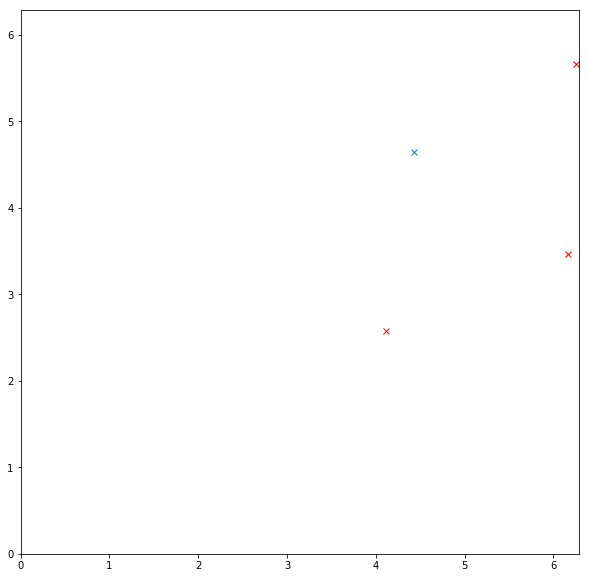

In [14]:
plt.figure(figsize=(10,10))
plt.plot([h],[k],marker='x')
plt.plot(X,Y,'_r',marker='x')
plt.xlim((0,2*pi))
plt.ylim((0,2*pi))

In [15]:
xs = np.linspace(-r,r,500)
ys_p = np.sqrt(r**2-xs**2)
ys_m = -np.sqrt(r**2-xs**2)

In [16]:
xs += h
ys_p += k
ys_m += k

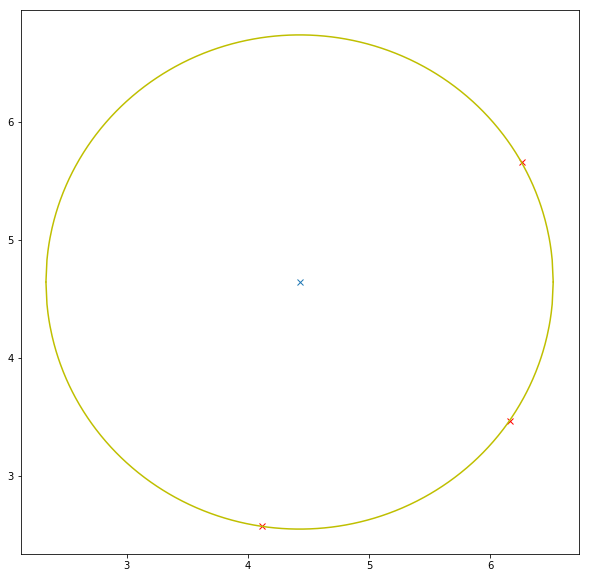

In [17]:
plt.figure(figsize=(10,10))
plt.plot([h],[k],marker='x')
plt.plot(X,Y,'_r',marker='x')
plt.plot(xs,ys_p,'y')
plt.plot(xs,ys_m,'y')

(0, 6.283185307179586)

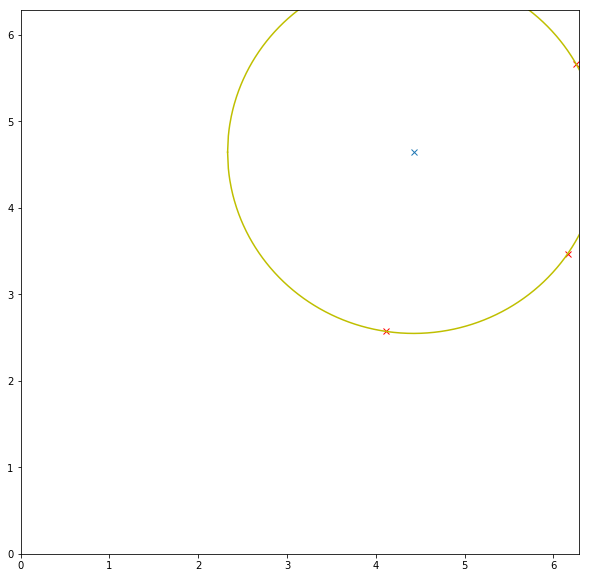

In [18]:
plt.figure(figsize=(10,10))
plt.plot([h],[k],marker='x')
plt.plot(X,Y,'_r',marker='x')
plt.plot(xs,ys_p,'y')
plt.plot(xs,ys_m,'y')
plt.xlim((0,2*pi))
plt.ylim((0,2*pi))

# Задание 2. 
Рассчитать длину той части (частей) окружности, которая умещается в пределах слоя, т.е. в квадрате
[0..2𝜋] x [0..2𝜋].

In [19]:
mask_p = np.array(xs<=2*pi ) * np.array(ys_p<=2*pi)
mask_m = np.array(xs<=2*pi ) * np.array(ys_m<=2*pi)

In [20]:
y1 = ys_p[np.argwhere(ys_p>2*pi)[0]-1] [0]
x1 = xs[np.argwhere(ys_p>2*pi)[0]-1] [0]
y2 = ys_p[np.argwhere(ys_p>2*pi)[-1]+1] [0]
x2 = xs[np.argwhere(ys_p>2*pi)[-1]+1] [0]

In [21]:
y3 = ys_p[np.argwhere(xs>2*pi)[0]-1] [0]
x3 = xs[np.argwhere(xs>2*pi)[0]-1] [0]
y4 = ys_m[np.argwhere(xs>2*pi)[0]-1] [0]
x4 = xs[np.argwhere(xs>2*pi)[0]-1] [0]

In [22]:
xn_p = xs[mask_p]
yn_p = ys_p[mask_p]
xn_m = xs[mask_m]
yn_m = ys_m[mask_m]

# !!!Замечание!!!!: из длины нужно вычесть длину прямой,концы которой обозначены черными крестами. Эта прямая не является частью окружности.

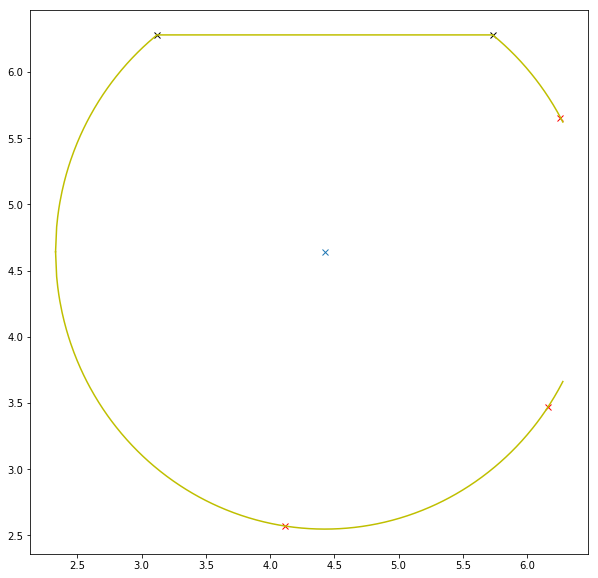

In [23]:
plt.figure(figsize=(10,10))
plt.plot([h],[k],marker='x')
plt.plot([x1],[y1],'k',marker='x')
plt.plot([x2],[y2],'k',marker='x')
plt.plot(X,Y,'_r',marker='x')
plt.plot(xn_p,yn_p,'y')
plt.plot(xn_m,yn_m,'y')

In [24]:
xn_p = xs[mask_p]
yn_p = ys_p[mask_p]
xn_m = xs[mask_m]
yn_m = ys_m[mask_m]

In [25]:
mat1 = np.dstack((xn_p,yn_p))[0][1:]- np.dstack((xn_p,yn_p))[0][:-1]

In [26]:
mat2 = np.dstack((xn_m,yn_m))[0][1:]- np.dstack((xn_m,yn_m))[0][:-1]

In [27]:
temp_len = np.linalg.norm(mat1,axis=1).sum() + np.linalg.norm(mat2,axis=1).sum()

In [28]:
veca = (x2-x1,y2-y1)

In [29]:
fin_len = temp_len - np.linalg.norm(veca)

## Длина части окружности, попавшей в квдрат [0,2pi]x[0,2pi]

In [30]:
fin_len

8.3021029648002251

## Выполним проверку
аналитическая длина окружности:


In [31]:
2*pi*r

13.161175931230764

In [32]:
mat3 = np.dstack((xs,ys_p))[0][1:]- np.dstack((xs,ys_p))[0][:-1]
mat4 = np.dstack((xs,ys_m))[0][1:]- np.dstack((xs,ys_m))[0][:-1]

длина окружности построенной по точкам

In [33]:
np.linalg.norm(mat3,axis=1).sum() + np.linalg.norm(mat4,axis=1).sum()

13.160863371342126

### Найдем аналитические длины дуг, которые не попали в квдрат [0,2pi]x[0,2pi]

In [34]:
vec1 = (x1-h,y1-k)
vec2 = (x2-h,y2-k)

In [36]:
vec3 = (x3-h,y3-k)
vec4 = (x4-h,y4-k)

In [37]:
mv1 = np.linalg.norm(vec1)
mv2 = np.linalg.norm(vec2)
mv3 = np.linalg.norm(vec3)
mv4 = np.linalg.norm(vec4)

In [38]:
ang1 = np.dot(vec1,vec2)/(mv1*mv2)

In [39]:
ang2 = np.dot(vec3,vec4)/(mv3*mv4)

In [40]:
2*pi*ang1 + 2*pi*ang2

4.9336685043825215

In [41]:
13.160863371342126 - 5.0854736891327539 

8.075389682209373

получился доволно близкий результат

# Задача 3.
Расположив окружность, построенную в задаче 1, на плоскости XY, а поверхность из слоя R точно
над ней, спроецировать окружность параллельно оси Z на поверхность. Рассчитать длину полученной
трехмерной кривой

In [42]:
bufR = buf[:,:,0]

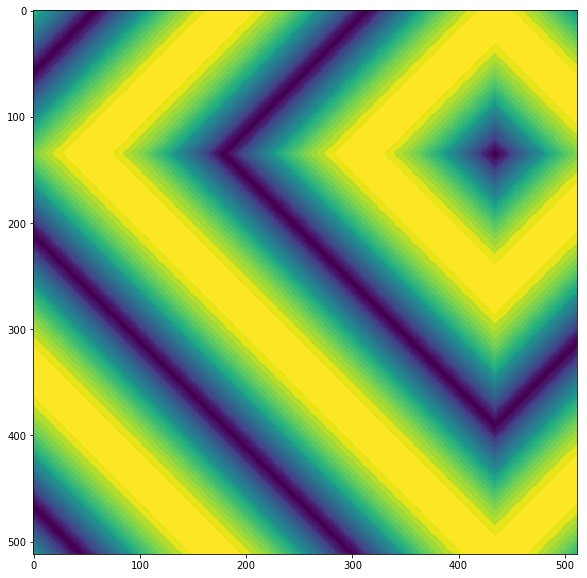

In [43]:
plt.figure(figsize = (10,10))
plt.imshow(bufR)

In [44]:
xn_p_resc = np.rint(rescale(xn_p,0,2*pi,0,511)).astype(np.int)
xn_m_resc = np.rint(rescale(xn_m,0,2*pi,0,511)).astype(np.int)
yn_p_resc = 511 - np.rint(rescale(yn_p,0,2*pi,0,511)).astype(np.int)
yn_m_resc = 511 - np.rint(rescale(yn_m,0,2*pi,0,511)).astype(np.int)

In [45]:
np.argwhere(xn_p == x1)

array([[94]])

In [46]:
z_p = bufR[xn_p_resc,yn_p_resc]
z_m = bufR[xn_m_resc,yn_m_resc]

In [47]:
from mpl_toolkits.mplot3d import Axes3D

In [48]:
z1 = z_p[np.argwhere(xn_p == x1)] [0,0]
z2 = z_p[np.argwhere(xn_p == x2)] [0,0]

# !!!Замечание!!!!: как и в предыдущем случае из длины нужно вычесть длину прямой,концы которой обозначены черными крестами 

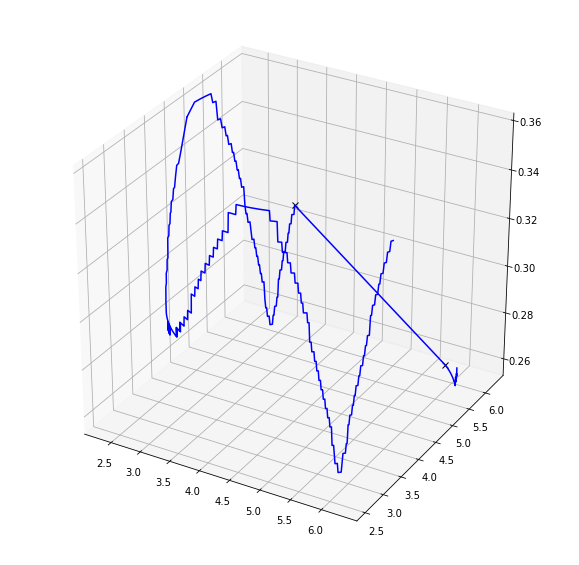

In [49]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plt.plot([x1],[y1],[z1],'k',marker='x')
plt.plot([x2],[y2],[z2],'k',marker='x')
plt.plot(xn_p,yn_p,z_p,'b')
plt.plot(xn_m,yn_m,z_m,'b')

In [50]:
vecz= (x2-x1,y2-y1,z2-z1)

In [51]:
matz1 = np.dstack((xn_p,yn_p,z_p))[0][1:]- np.dstack((xn_p,yn_p,z_p))[0][:-1]

In [52]:
matz2 = np.dstack((xn_m,yn_m,z_m))[0][1:]- np.dstack((xn_m,yn_m,z_m))[0][:-1]

In [53]:
temp_lenz = np.linalg.norm(matz1,axis=1).sum() + np.linalg.norm(matz2,axis=1).sum()

In [54]:
fin_lenz = temp_lenz - np.linalg.norm(vecz)

## Результирующая длина

In [55]:
fin_lenz

8.3964399533949354

# Задача 4.
Представив, что слои R и G находятся точно друг над другом, рассчитать объемы под поверхностью,
заданной в слое R. Искомые объемы ограничены сторонами ячеек шахматной доски в слое G, которые
помечены символами

In [56]:
bufG = buf[:,:,1]

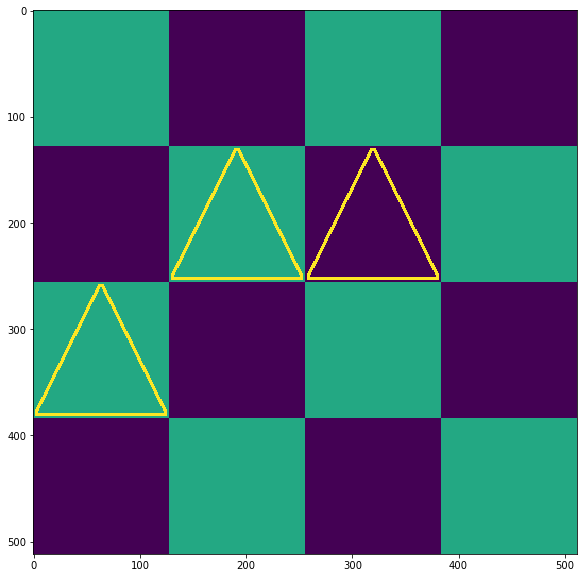

In [57]:
plt.figure(figsize = (10,10))
plt.imshow(bufG)

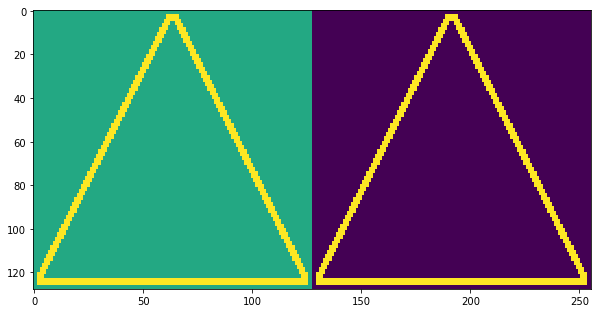

In [58]:
plt.figure(figsize = (10,10))
plt.imshow(bufG[128:256,128:384])

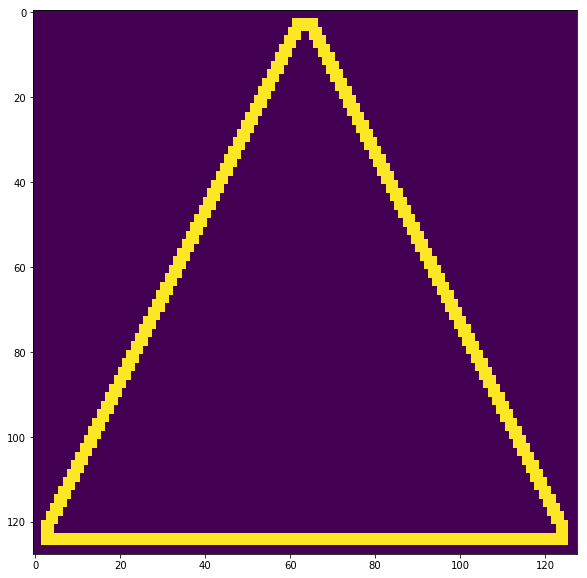

In [59]:
plt.figure(figsize = (10,10))
plt.imshow(bufG[256:384,:128])

## Пределы интегрирования
по прямоугольнику

x: 128 383 

y: 256 383


Переведенные в отрезок [0, Pi]

x: 1.57387029 4.70931501

y: 3.14774058 4.70931501


In [60]:
xa1 = rescale(np.array([128]),0,511,0,2*pi)[0]
print(xa1)

1.57387029221


In [61]:
xb1 = rescale(np.array([383]),0,511,0,2*pi)[0]
print(xb1)

4.70931501497


In [62]:
ya1 = rescale(np.array([256]),0,511,0,2*pi)[0]
print(ya1)

3.14774058442


In [63]:
yb1 = rescale(np.array([383]),0,511,0,2*pi)[0]
print(yb1)

4.70931501497


## Пределы интегрирования
по квадрату

x: 0 127 

y: 128 255


Переведенные в отрезок [0, Pi]

x: 0 1.56157443

y: 1.57387029 3.13544472


In [64]:
xa2 = rescale(np.array([0]),0,511,0,2*pi)[0]
print(xa2)

0.0


In [65]:
xb2 = rescale(np.array([127]),0,511,0,2*pi)[0]
print(xb2)

1.56157443055


In [66]:
ya2 = rescale(np.array([128]),0,511,0,2*pi)[0]
print(ya2)

1.57387029221


In [67]:
yb2 = rescale(np.array([255]),0,511,0,2*pi)[0]
print(yb2)

3.13544472276


In [68]:
import scipy.interpolate

In [69]:
surf = scipy.interpolate.RectBivariateSpline(np.linspace(0, 2*pi, 512), np.linspace(0, 2*pi, 512), bufG)

# Искомый объем

In [70]:
surf.integral(xa1,xb1,ya1,yb1) + surf.integral(xa2,xb2,ya2,yb2)

1.07460302838647

# Задача 5.
В слое B хранятся температурные данные: строки = годы, столбцы = дни. Годы прорежены через 1
строку. Для каждого года рассчитать количество дней, в которых температура находилась в пределах
10% от максимальной. Построить график зависимости количества найденных дней от года.

In [71]:
bufB = buf[:,:,2]

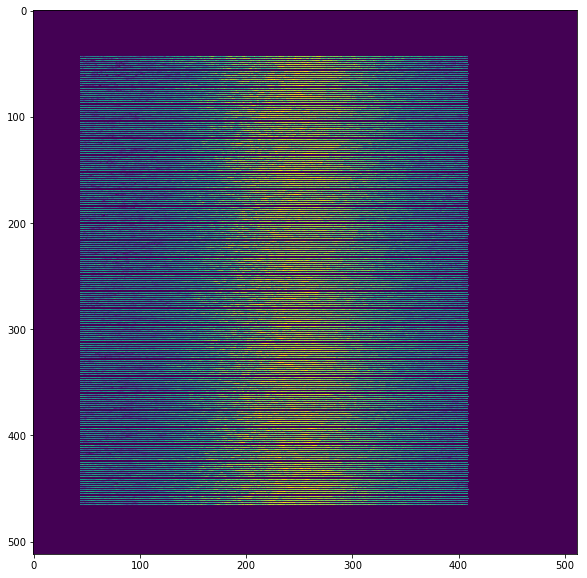

In [72]:
plt.figure(figsize = (10,10))
plt.imshow(bufB)

In [73]:
temp = bufB[np.any(bufB,axis=1)]

In [74]:
data = temp[:,np.any(temp,axis=0)]

In [75]:
data.shape

(212, 366)

In [76]:
data[:,:-1].min()

0.015686275

In [77]:
data[:,-1].min()

0.0

In [78]:
temp_max = data.max()

In [79]:
print("Максимальная температура ", temp_max)

Максимальная температура  0.247059


# Замечания:
Получили матрицу 212x366. В невисокосных годах - по одному лишнему дню в конце, и у этих лишних дней значение равно нулю. Как убедились ячейкой выше строго нулевое значение, есть только у этих лишних дней. И учитывая значение максимальной температуры, эти дни не повлияют на количество дней, температура в которых отличалась от максимальной менее чем на 10%.

## Если под словом "максимальной" - имелось в виду максимальная за все время:

In [80]:
temp_max = data.max()

In [81]:
ss = np.sum(   abs((data-temp_max))<0.1*temp_max, axis=1)

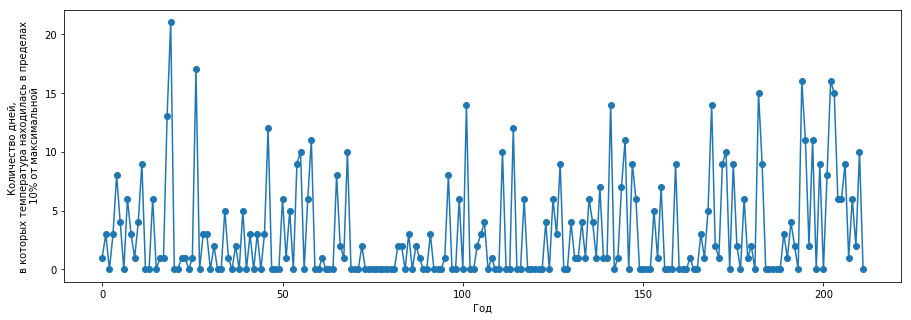

In [82]:
plt.figure(figsize=(15,5))
plt.plot(range(0,212),ss,marker = 'o')
plt.xlabel('Год')
plt.ylabel('Количество дней, \n в которых температура находилась в пределах \n 10% от максимальной')

## Если под словом "максимальной" - имелось в виду максимальная за год:

In [83]:
year_temp_max = data.max(axis=1)

In [84]:
year_temp_max = year_temp_max[:, np.newaxis]

In [85]:
year_ss = np.sum(   abs((data-year_temp_max))<0.1*year_temp_max, axis=1)

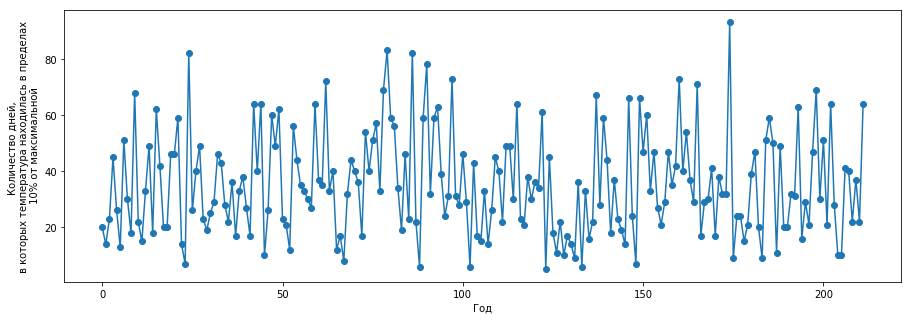

In [86]:
plt.figure(figsize=(15,5))
plt.plot(range(0,212),year_ss,marker = 'o')
plt.xlabel('Год')
plt.ylabel('Количество дней, \n в которых температура находилась в пределах \n 10% от максимальной')